Students: Yannick Furtado, Shoaib Ahmed

In [ ]:
#importing libraries

import pandas as pd
import seaborn as sns 
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/DataPCA.csv') #reading the csv file

In [ ]:
df.head() #looking at first few values

,x1,x2,x3,x4,x5,x6,x7
0,0.840261,-1.088160,4.861744,4.273055,4.312457,-0.137834,0.076453
1,1.320591,-1.174113,5.247360,3.295027,4.283410,-0.363759,-0.170605
2,1.537909,-1.175882,5.556251,3.394183,3.971574,-0.888398,0.080617
3,0.363552,-1.130608,4.329890,5.547488,4.539732,0.342330,0.251953
4,1.567938,-1.114719,5.542104,2.493071,4.156157,-0.609694,-0.291367


In [ ]:
df.isna().sum() #checking if null columns present

x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
x7    0
dtype: int64

In [ ]:
corr = df.corr() #getting correlation matrix for the dataframe

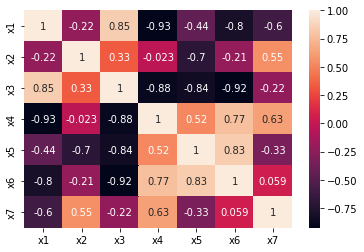

In [ ]:
sns.heatmap(corr, annot = True) #plotting a heatmap of the correlation matrix

We can observe that (x1, x4), (x3, x6) are highly negatively correlated.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe64ff286d0>,
      dtype=object)

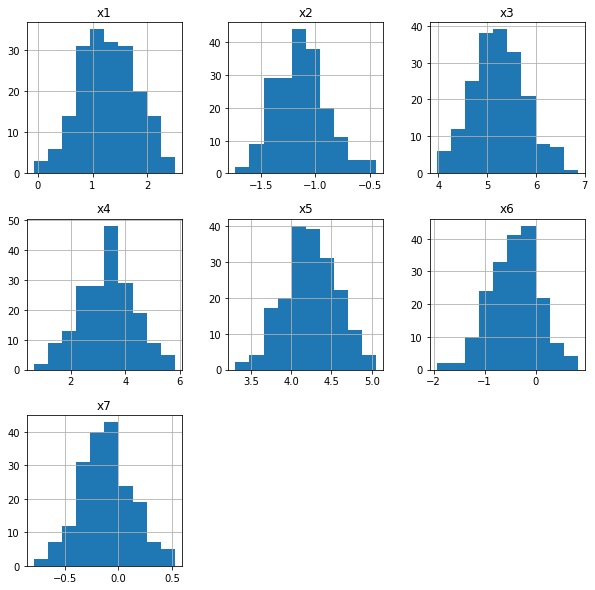

In [ ]:
df.hist(figsize = (10,10)) #plotting histograms for all the columns of the dataframe

We can see that all the columns follow gaussian distribution.

In [ ]:
df = (df - df.mean())/df.std() #normalizing the data

In [ ]:
pca_7 = PCA(n_components = 7) #creating a PCA with 7 components

In [ ]:
pca_7.fit(df) #fitting it over the dataframe

PCA(n_components=7)

In [ ]:
df_pca = pca_7.transform(df) #transforming the dataframe according to the fit

In [ ]:
pca_7.explained_variance_ratio_*100 #getting the explained variance ratio for each dimension

array([6.09270567e+01, 3.19460967e+01, 6.49562011e+00, 6.07238580e-01,
       2.16027661e-02, 1.98460843e-03, 4.00494511e-04])

We can see that the first dimension and second dimension alone make up for 60.9% and 31.9% of the total variance explained.

In [ ]:
np.cumsum(pca_7.explained_variance_ratio_*100) #getting cumulative sum of variance explained

array([ 60.92705672,  92.87315344,  99.36877355,  99.97601213,
        99.9976149 ,  99.99959951, 100.        ])

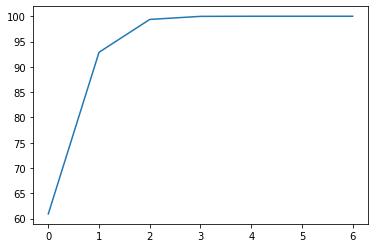

In [ ]:
plt.plot(np.cumsum(pca_7.explained_variance_ratio_*100)) #plotting the cumulative sum of explained variance

We can see the first three dimensions explain more than 99% of the variance explained.

In [ ]:
dims = [1,2,3,4]

#running a loop and computing the MSE for reconstruction w.r.t different no of PCA dimensions

for i in dims:
  pca_k = PCA(n_components = i, random_state = 2022)
  pca_k.fit(df)
  df_pca_k = pca_k.transform(df)
  df_pca_k_r = pca_k.inverse_transform(df_pca_k)
  print('Mean Squared Error for PCA dimensions =',i,'= ',mean_squared_error(df, df_pca_k_r))

Mean Squared Error for PCA dimensions = 1 =  0.3886729621311219
Mean Squared Error for PCA dimensions = 2 =  0.07089336836641909
Mean Squared Error for PCA dimensions = 3 =  0.006279042040781368
Mean Squared Error for PCA dimensions = 4 =  0.00023861617076931428


After reconstructing the data with 1, 2, 3 and 4 dimensions we can even for 2 dimensions the MSE is very low and it further decreases 1e-3 for 3 dimensions.